In [1]:
import os
import tweepy as tw
#import xlsxwriter

In [206]:
consumer_key= 'ConsumerKey'
consumer_secret= 'ConsumerSecret'
access_token= 'AccessToken'
access_token_secret= 'AccessSecretToken'

In [19]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [12]:
# Define the search term and the date_since date as variables
search_words = "COVID-19"
date_since = "2020-01-01"

In [20]:
# Collect tweets
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since).items(1000)

# # # Iterate and print tweets
# # for tweet in tweets:
# #     print(tweet.text)

In [14]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xlsxwriter

workbook = xlsxwriter.Workbook('data_tweets.xlsx')
worksheet = workbook.add_worksheet()


In [23]:
row=0
col=0
tweet_list=[]

results = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(100)
# for tweet in results:
#   print(tweet)
for tweet in results:
   tweet_list.append([tweet.user.screen_name, tweet.text])
for user, tweet in tweet_list:
  global row
  global col
  worksheet.write(row, col, user)
  worksheet.write(row, col + 1, tweet)
  row += 1
workbook.close()

C:\Users\Rhuta\anaconda3\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [131]:
# import pandas module 
import pandas as pd 
import numpy as np
# making dataframe 
df = pd.ExcelFile("data_tweets.xlsx").parse()

In [137]:
df1 = pd.DataFrame({'0', '1'})
df1 = df1.T
# df3 = df1.append(df, ignore_index=True)
df3 = pd.DataFrame(np.concatenate( (df1.values, df.values), axis=0 ))
new_header = df3.iloc[0] #grab the first row for the header
df3 = df[1:] #take the data less the header row
df3.columns = new_header #set the header row as the df header

In [139]:
df3.rename(columns = {'1':'user', '0':'text'}, inplace = True)

C:\Users\Rhuta\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Cleaning data

In [154]:
import re
def cleaning(x):
    x = x.replace('\n', x)
    x = (re.sub('\s+',' ',x))
    x = x.replace('RT ','')
    x = ' '.join([ word for word in x.split() if not (word.startswith('@') or word.startswith('https')) ])
    return x

df3['text'] = df3['text'].apply(cleaning)

C:\Users\Rhuta\AppData\Local\Temp/ipykernel_33980/2609527805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['text'].apply(cleaning)


In [155]:
#removing all URL's and emoticons
#refernce: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df3['text'] = df3['text'].apply(remove_emoji)

C:\Users\Rhuta\AppData\Local\Temp/ipykernel_33980/1559232170.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['text'].apply(remove_emoji)


In [156]:
df3['text']

1     Sen. Merkley says his 26 y/o son was in the ho...
2     Who calls the shots in Ontario's COVID-19 resp...
3     The private sector has been 99.9% back to work...
4     North Korea ‘Sending Out SOS’ as It Admits Unn...
5     "Since COVID-19 operates in a highly age speci...
                            ...                        
94    "Determinants of COVID-19 Vaccine-Induced Myoc...
95    The private sector has been 99.9% back to work...
96    this is *amazing* news. Thank you to for leade...
97    This time two weeks ago I lost my beautiful 7 ...
98    The scholarship deadline for our Deep Dive Int...
Name: text, Length: 98, dtype: object

### Sentiment Analysis

In [157]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

In [207]:
#calculating polarity scores
analyzer = SentimentIntensityAnalyzer()

for i in ['pos', 'neg', 'neu', 'compound']:
    df3[i] = df3['text'].apply(lambda comment: analyzer.polarity_scores(comment)[i])

C:\Users\Rhuta\AppData\Local\Temp/ipykernel_33980/4058693373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[i] = df3['text'].apply(lambda comment: analyzer.polarity_scores(comment)[i])


In [172]:
import matplotlib.pyplot as plt

def sentiment(x):

# posSum = 0
# negSum = 0
# neuSum = 0
    if (x >= 0.5):
        return "Positive"
    elif (x <= -0.5):
        return "Negative"
    else:
        return "Neutral"

df3['sentiment_polarity'] = df3['compound'].apply(sentiment)

df4 = df3['sentiment_polarity'].value_counts().rename_axis('sentiment_polarity').reset_index(name='counts')

#plt.title("Sentiment Analysis")


C:\Users\Rhuta\AppData\Local\Temp/ipykernel_33980/1531232689.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment_polarity'] = df3['compound'].apply(sentiment)


In [182]:
df4

,sentiment_polarity,counts
0,Neutral,66
1,Negative,19
2,Positive,13


<AxesSubplot:xlabel='sentiment_polarity'>

<Figure size 720x360 with 0 Axes>

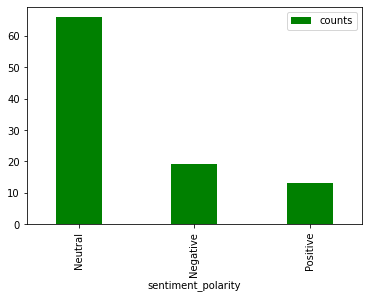

In [185]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
df4.plot.bar(x="sentiment_polarity", y="counts", color ='green',
        width = 0.4)

In [187]:
from wordcloud import WordCloud
line = " ".join(df3['text'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(line)

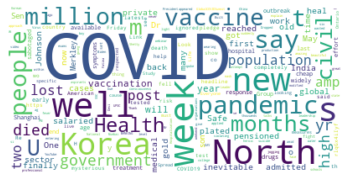

In [188]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [189]:
dataset = df3.loc[:, ['text', 'sentiment_polarity']]
dataset['text']=dataset['text'].str.lower()

In [190]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
    
dataset['text'] = dataset['text'].apply(remove_stopwords)

dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rhuta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment_polarity
1,sen. merkley says 26 y/o son hospital last wee...,Neutral
2,calls shots ontario's covid-19 response? us fi...,Neutral
3,private sector 99.9% back work post covid-19 m...,Neutral
4,north korea ‘sending sos’ admits unnamed disea...,Positive
5,"""since covid-19 operates highly age specific m...",Neutral
...,...,...
94,"""determinants covid-19 vaccine-induced myocard...",Neutral
95,private sector 99.9% back work post covid-19 m...,Neutral
96,*amazing* news. thank leadership pledge great ...,Positive
97,time two weeks ago lost beautiful 7 year old c...,Neutral


In [191]:
def word_tokens(text):
    tokens = nltk.word_tokenize(text)
    cleanedTokens = [word for word in tokens if word[0].isalpha()]
    return cleanedTokens

dataset['token'] = dataset['text'].apply(word_tokens)
dataset

,text,sentiment_polarity,token
1,sen. merkley says 26 y/o son hospital last wee...,Neutral,"[sen., merkley, says, y/o, son, hospital, last..."
2,calls shots ontario's covid-19 response? us fi...,Neutral,"[calls, shots, ontario, covid-19, response, us..."
3,private sector 99.9% back work post covid-19 m...,Neutral,"[private, sector, back, work, post, covid-19, ..."
4,north korea ‘sending sos’ admits unnamed disea...,Positive,"[north, korea, sending, sos, admits, unnamed, ..."
5,"""since covid-19 operates highly age specific m...",Neutral,"[since, covid-19, operates, highly, age, speci..."
...,...,...,...
94,"""determinants covid-19 vaccine-induced myocard...",Neutral,"[determinants, covid-19, vaccine-induced, myoc..."
95,private sector 99.9% back work post covid-19 m...,Neutral,"[private, sector, back, work, post, covid-19, ..."
96,*amazing* news. thank leadership pledge great ...,Positive,"[amazing, news, thank, leadership, pledge, gre..."
97,time two weeks ago lost beautiful 7 year old c...,Neutral,"[time, two, weeks, ago, lost, beautiful, year,..."


In [192]:
x = dataset.text
y = dataset.sentiment_polarity

In [197]:
#train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state =26105111)

In [198]:
#TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1261


In [199]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Naive Bayes classification

In [200]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

# predict
classifier.predict(X_test)

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral'], dtype='<U8')

In [201]:
classifier.score(X_test, Y_test)

0.65

## SVM

In [202]:
from sklearn import linear_model
classifier_svm= linear_model.SGDClassifier(warm_start=True)

fit_svm=classifier_svm.fit(X_train, Y_train)

classifier_svm.predict(X_test)

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral',
       'Neutral', 'Neutral'], dtype='<U8')

In [203]:
classifier_svm.score(X_test, Y_test)

0.7

In [204]:
for i in dataset['sentiment_polarity']:
    if (i == "Neutral"):
        dataset['polaity_cluster'] = 0
    elif (i == "Positive"):
        dataset['polarity_cluster'] = 1
    elif (i == "Negative"):
        dataset['polaity_cluster'] = -1
        

In [205]:
dataset

,text,sentiment_polarity,token,polaity_cluster,polarity_cluster
1,sen. merkley says 26 y/o son hospital last wee...,Neutral,"[sen., merkley, says, y/o, son, hospital, last...",0,1
2,calls shots ontario's covid-19 response? us fi...,Neutral,"[calls, shots, ontario, covid-19, response, us...",0,1
3,private sector 99.9% back work post covid-19 m...,Neutral,"[private, sector, back, work, post, covid-19, ...",0,1
4,north korea ‘sending sos’ admits unnamed disea...,Positive,"[north, korea, sending, sos, admits, unnamed, ...",0,1
5,"""since covid-19 operates highly age specific m...",Neutral,"[since, covid-19, operates, highly, age, speci...",0,1
...,...,...,...,...,...
94,"""determinants covid-19 vaccine-induced myocard...",Neutral,"[determinants, covid-19, vaccine-induced, myoc...",0,1
95,private sector 99.9% back work post covid-19 m...,Neutral,"[private, sector, back, work, post, covid-19, ...",0,1
96,*amazing* news. thank leadership pledge great ...,Positive,"[amazing, news, thank, leadership, pledge, gre...",0,1
97,time two weeks ago lost beautiful 7 year old c...,Neutral,"[time, two, weeks, ago, lost, beautiful, year,...",0,1
